Visualización de los datos: antes de responder cualquier pregunta, hay que ver un resumen de los datos.

In [ ]:
pip install geopandas

In [9]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import geopandas as gpd


import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [7]:
camino_datos = "carpetas_completa_julio_2021.csv"

datos = pd.read_csv(camino_datos, parse_dates=True)
datos.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN
3,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.976379,19.331633,NaN
4,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.172189,19.387114,NaN


In [6]:
datos.tail()

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
1268633,2021.0,Julio,2021-07-30 18:22:00,2021,Julio,2021-07-31 22:57:23,ROBO A NEGOCIO CON VIOLENCIA,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN IZTAP...,IZP-9,UI-1SD,ROBO A NEGOCIO CON VIOLENCIA,PALMILLA,PINO,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,FUERO COMUN,-99.056355,19.320918,NaN
1268634,2021.0,Julio,2021-07-30 15:40:00,2021,Julio,2021-07-31 22:57:52,LESIONES CULPOSAS,FISCALÍA DE INVESTIGACIÓN DE DELITOS COMETIDOS...,59,UI-1CD,DELITO DE BAJO IMPACTO,NOTIFICACION DEL HOSPITAL NACIONAL HOMEOPÁTICO,NaN,NaN,CUAUHTEMOC,FUERO COMUN,NaN,NaN,NaN
1268635,2021.0,Julio,2021-07-31 14:00:00,2021,Julio,2021-07-31 23:01:38,DAÑO EN PROPIEDAD AJENA INTENCIONAL A BIENES I...,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN GUSTA...,GAM-2,UI-1CD,DELITO DE BAJO IMPACTO,AVENIDA INGENIERO EDUARDO MOLINA,AVENIDA 314,NUEVA ATZACOALCO,GUSTAVO A MADERO,FUERO COMUN,-99.087726,19.501652,NaN
1268636,2021.0,Mayo,2021-05-26 12:00:00,2021,Julio,2021-07-31 23:04:23,"ALLANAMIENTO DE MORADA, DESPACHO, OFICINA O ES...",FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN ALVAR...,AO-4,UI-1SD,DELITO DE BAJO IMPACTO,CURUCU NUM 17,NaN,AMPLIACIÓN TEPEACA,ALVARO OBREGON,FUERO COMUN,-99.233410,19.361710,NaN
1268637,2021.0,Julio,2021-07-31 17:00:00,2021,Julio,2021-07-31 23:05:44,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN GUSTA...,GAM-4,UI-1CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,VOLCAN POPOCATEPETL,NaN,LA PRADERA,GUSTAVO A MADERO,FUERO COMUN,-99.065366,19.475436,NaN


In [7]:
datos.describe()

,ao_hechos,ao_inicio,longitud,latitud,tempo
count,1.268202e+06,1.268638e+06,1.217271e+06,1.217271e+06,0.0
mean,2.018189e+03,2.018341e+03,-9.913721e+01,1.938723e+01,NaN
std,1.875047e+00,1.571532e+00,5.994630e-02,6.996396e-02,NaN
min,1.906000e+03,2.016000e+03,-1.002319e+02,1.909535e+01,NaN
25%,2.017000e+03,2.017000e+03,-9.917558e+01,1.933955e+01,NaN
50%,2.018000e+03,2.018000e+03,-9.914210e+01,1.938976e+01,NaN
75%,2.020000e+03,2.020000e+03,-9.909967e+01,1.943771e+01,NaN
max,2.021000e+03,2.021000e+03,-9.894686e+01,1.958333e+01,NaN


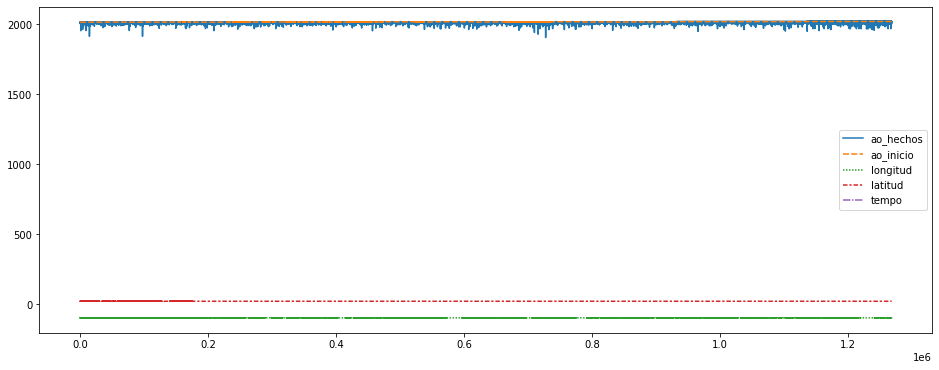

In [8]:
plt.figure(figsize=(16,6))

sns.lineplot(data=datos)



# Pregunta 1

Pregunta 1: ¿Qué pruebas realizarías para garantizar la calidad de estos datos?

1: La primera prueba sería ver columna por columna, cuántos datos son nulos o NaN. 

Lo que esta prueba nos indica es que hay tener cuidado al utilizar los datos de las columnas con muchos datos faltantes. En caso de que omitan demasiados datos habrá que descartar la columna, imputar los datos faltantes o inferirlos a partir de otras columnas.

A juzgar solamente por la visualización de los datos hay tres o cuatro columnas con muchos valores faltantes.


2: La segunda prueba que haría sería revisar las columnas de datos categóricos que vaya a usar (por ejemplo la columna de alcaldías). Imprimiría los valores únicos para ver que no haya incosistencias tipográficas.

Esta prueba permite que pueda trabajar con dichos datos posteriormente.

3: La tercera prueba sería revisar que los valores estén dentro de un rango verosímil. Por ejemplo, que las coordenadas correspondan a la Ciudad de México.

Esto indicaría que los datos fueron correctamente capturados.

# Pregunta 2:

 Identifica los delitos que van a la alza y a la baja en la CDMX (ten cuidado con los delitos
con pocas ocurrencias).

Para esta pregunta agruparé los delitos según su nombre único y su año. luego graficaré los datos para observar cuales han aumentado y disminuido. Tendré precaución con los delitos de pocas ocurrencias.

In [ ]:
delitos = datos['delito'].unique()

# sort them alphabetically and then take a closer look
delitos.sort()
delitos

In [ ]:
años = datos['ao_hechos'].unique()

# sort them alphabetically and then take a closer look
años.sort()
años

Dado que los años presentan disparidades habrá que ver cuántos delitos se reportaron cada año para ver a partir de cuál año hay suficientes datos como para utilizar la información.

In [ ]:
cont = datos['ao_hechos'].value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(cont)

A partir del año 2000 hay más de 100 datos por año, de 2011 hay más de 1000 datos por año. Debido a la cantidad de tipos distintos de delitos que hay creo que esprudente trabajar con los datos a partir de 2011. 2021 queda descartado porque es un año en curso.

Tras trabajar un rato con los datos llegué a dos conclusiones: trabajaré a partir de los datos de 2016, porque la cantidad de datos aumenta bastante a partir de ese año. Segundo, tendré que utilizar métricas con valores absolutos y relativos debido a las disparidades de datos reportados cada año.

In [45]:
año_delito = datos[['ao_hechos', 'delito']]

dos_dieciseis = año_delito[año_delito['ao_hechos'] == 2016]['delito'].value_counts()
d16 = pd.Series.to_frame(dos_dieciseis)
d16['Delito'] = list(d16.index)
d16.rename(columns = {'delito':'cantidad'}, inplace = True)

dos_diecisiete = año_delito[año_delito['ao_hechos'] == 2017]['delito'].value_counts()
d17 = pd.Series.to_frame(dos_diecisiete)
d17['Delito'] = list(d17.index)
d17.rename(columns = {'delito':'cantidad'}, inplace = True)

dos_dieciocho = año_delito[año_delito['ao_hechos'] == 2018]['delito'].value_counts()
d18 = pd.Series.to_frame(dos_dieciocho)
d18['Delito'] = list(d18.index)
d18.rename(columns = {'delito':'cantidad'}, inplace = True)

dos_diecinueve = año_delito[año_delito['ao_hechos'] == 2019]['delito'].value_counts()
d19 = pd.Series.to_frame(dos_diecinueve)
d19['Delito'] = list(d19.index)
d19.rename(columns = {'delito':'cantidad'}, inplace = True)

dos_veinte = año_delito[año_delito['ao_hechos'] == 2020]['delito'].value_counts()
d20 = pd.Series.to_frame(dos_veinte)
d20['Delito'] = list(d20.index)
d20.rename(columns = {'delito':'cantidad'}, inplace = True)

# Agrega columnas de año

d16 = d16.assign(año = lambda x: 2016)
d17 = d17.assign(año = lambda x: 2017)
d18 = d18.assign(año = lambda x: 2018)
d19 = d19.assign(año = lambda x: 2019)
d20 = d20.assign(año = lambda x: 2020)


#Agrega columnas de ocurrencia relativa

d16 = d16.assign(tasa = lambda x: (x['cantidad'] / d16['cantidad'].sum() * 100)) 
d17 = d17.assign(tasa = lambda x: (x['cantidad'] / d17['cantidad'].sum() * 100)) 
d18 = d18.assign(tasa = lambda x: (x['cantidad'] / d18['cantidad'].sum() * 100)) 
d19 = d19.assign(tasa = lambda x: (x['cantidad'] / d19['cantidad'].sum() * 100)) 
d20 = d20.assign(tasa = lambda x: (x['cantidad'] / d20['cantidad'].sum() * 100)) 


# Junta en un solo df
frames = [d16, d17, d18, d19, d20]
  
result = pd.concat(frames)
d16.head(15)


,cantidad,Delito,año,tasa
VIOLENCIA FAMILIAR,18120,VIOLENCIA FAMILIAR,2016,9.294071
ROBO DE OBJETOS,15028,ROBO DE OBJETOS,2016,7.708129
ROBO A NEGOCIO SIN VIOLENCIA,13434,ROBO A NEGOCIO SIN VIOLENCIA,2016,6.890538
DENUNCIA DE HECHOS,11373,DENUNCIA DE HECHOS,2016,5.833415
FRAUDE,10881,FRAUDE,2016,5.581059
AMENAZAS,9975,AMENAZAS,2016,5.116355
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,6319,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,2016,3.241128
ROBO A CASA HABITACION SIN VIOLENCIA,5755,ROBO A CASA HABITACION SIN VIOLENCIA,2016,2.951842
ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA,5719,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,2016,2.933377
FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO,4613,FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMEN...,2016,2.366090


In [47]:
d20.head(15)

,cantidad,Delito,año,tasa
VIOLENCIA FAMILIAR,28224,VIOLENCIA FAMILIAR,2020,14.073158
AMENAZAS,14386,AMENAZAS,2020,7.173202
FRAUDE,13184,FRAUDE,2020,6.573856
ROBO DE OBJETOS,9105,ROBO DE OBJETOS,2020,4.539970
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,8660,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,2020,4.318082
ROBO DE ACCESORIOS DE AUTO,7404,ROBO DE ACCESORIOS DE AUTO,2020,3.691811
ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIENDAS DE AUTOSERVICIO),6160,ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIE...,2020,3.071523
ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA,5168,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,2020,2.576888
ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,4939,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,2020,2.462703
ROBO A NEGOCIO SIN VIOLENCIA,4450,ROBO A NEGOCIO SIN VIOLENCIA,2020,2.218876


In [43]:
# Imprime datos
sorted_df = result.sort_values(by='Delito')
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 5,
                       ):
    print(sorted_df)

                                                    cantidad  \
ABANDONO DE PERSONA                                      671   
ABANDONO DE PERSONA                                      588   
ABANDONO DE PERSONA                                      621   
ABORTO                                                    82   
ABORTO                                                   114   
ABORTO                                                   133   
ABORTO                                                   115   
ABORTO                                                    83   
ABUSO DE AUTORIDAD                                      1249   
ABUSO DE AUTORIDAD                                      1291   
ABUSO DE AUTORIDAD                                      1689   
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PU...      1923   
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PU...        13   
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PU...      2185   
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FU

In [ ]:
#Imprime solo la evolución de los delitos principales y haz un segundo reacomodo según el año.


Tras observar la visualización de las tablas de 2016 y 2020 para ver los delitos de alta ocurrencia, utilizo la tercera tabla para ver cuáles han aumentado o disminuido.

Delitos que disminuyeron:

Robo de objetos

Robo a negocio sin violencia

-------------

Delitos que aumentaron

Violencia familiar

Amenazas

Narcomenudeo posesión simple

Fraude (ligero aumento)

robo de accesorios de auto

---------

Delitos que subieron y bajaron

Robo a transeunte con violencia

robo de objetos en el interior de un vehículo

# Pregunta 3

Tengo que agrupar y contar según alcaldías y luego observar la menor y la mayor.

In [68]:
alcaldia_delito = datos[['alcaldia_hechos', 'delito']]

alcaldia_delito = alcaldia_delito.groupby(['alcaldia_hechos']).count()
alcaldia_delito = alcaldia_delito.sort_values(by='delito')
alcaldia_delito.head(230)

,delito
alcaldia_hechos,
ABALA,1
MATIAS ROMERO,1
MARIN,1
MARIANO ESCOBEDO,1
MARAVATIO,1
...,...
XOCHICOATLAN,1
CUAUTEPEC DE HINOJOSA,1
XICO,1


In [54]:
alcaldia_delito.tail()

,delito
alcaldia_hechos,
ALVARO OBREGON,86194
BENITO JUAREZ,104735
GUSTAVO A MADERO,127220
IZTAPALAPA,190706
CUAUHTEMOC,197609


La alcaldía con más delitos es Cuauhtemoc; las alcaldías con menos delitos y al menos un delito reportado son 228 en total, entre las cuales están Abala, Xico, Matías Romero y Maravatio por ejemplo.

Una explicación es que Cuauhtemoc tiene mayor densidad poblacional y población total que muchas otras alcaldías y por ende ocurren más delitos de los cuales se reportan más, además de tener mayor infraestructura para el reporte de tales.

Las alcaldías que solo reportan un delito por el contrario tienen pocos habitantes y (quizá) menor conciencia de reporte de delitos e infraestructura para reportarlos.

# Pregunta 4

Para esta pregunta agruparé según año y mes

In [37]:
año_mes = datos[['ao_hechos', 'mes_hechos']]

año_mes = año_mes.groupby(['ao_hechos', 'mes_hechos'], as_index=False).size()

lista = []
for i in año_mes.iloc[:,1]:
  if i == 'Enero':
    lista.append(1) 
  elif i == 'Febrero':
    lista.append(2)
  elif i == 'Marzo':
    lista.append(3)
  elif i == 'Abril':
    lista.append(4)
  elif i == 'Mayo':
    lista.append(5)
  elif i == 'Junio':
    lista.append(6)
  elif i == 'Julio':
    lista.append(7)
  elif i == 'Agosto':
    lista.append(8)
  elif i == 'Septiembre':
    lista.append(9)
  elif i == 'Octubre':
    lista.append(10)
  elif i == 'Noviembre':
    lista.append(11)
  elif i == 'Diciembre':
    lista.append(12)


año_mes = año_mes.assign(mes = lista)

año_mes = año_mes[año_mes['ao_hechos'] > 2015] #and año_mes['ao_hechos'] < 2021]
año_mes = año_mes[año_mes['ao_hechos'] < 2021]
año_mes = año_mes.sort_values(by=['ao_hechos', 'mes'], ascending=[True, True])
#año_mes = año_mes.drop(año_mes[año_mes['ao_hechos'] < 2016].index, inplace=True)

print(año_mes.head(30))
print(año_mes.tail(30))
#alcaldia_delito = alcaldia_delito.sort_values(by='delito')


     ao_hechos  mes_hechos   size  mes
445     2016.0       Enero  15162    1
446     2016.0     Febrero  15500    2
449     2016.0       Marzo  15975    3
442     2016.0       Abril  16412    4
450     2016.0        Mayo  16496    5
448     2016.0       Junio  15255    6
447     2016.0       Julio  15474    7
443     2016.0      Agosto  16617    8
453     2016.0  Septiembre  17518    9
452     2016.0     Octubre  17804   10
451     2016.0   Noviembre  16606   11
444     2016.0   Diciembre  16144   12
457     2017.0       Enero  17615    1
458     2017.0     Febrero  16480    2
461     2017.0       Marzo  18673    3
454     2017.0       Abril  17251    4
462     2017.0        Mayo  19752    5
460     2017.0       Junio  19456    6
459     2017.0       Julio  19276    7
455     2017.0      Agosto  20188    8
465     2017.0  Septiembre  19039    9
464     2017.0     Octubre  20916   10
463     2017.0   Noviembre  19564   11
456     2017.0   Diciembre  18962   12
469     2018.0       Ener

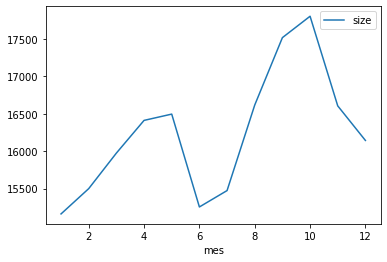

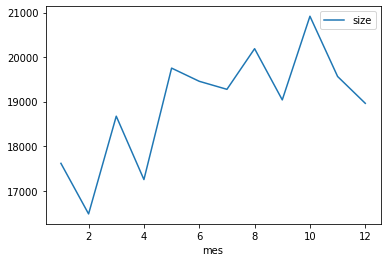

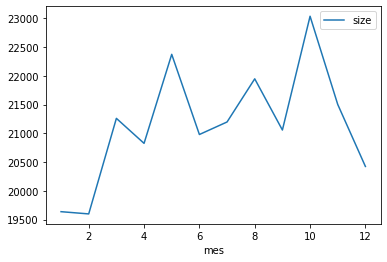

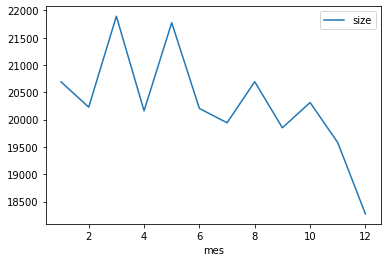

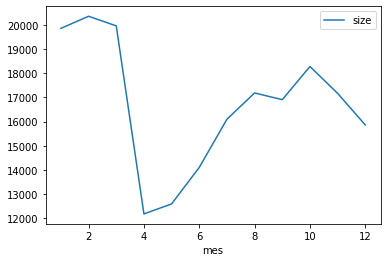

In [40]:
d16 = año_mes[año_mes['ao_hechos'] == 2016]
d17 = año_mes[año_mes['ao_hechos'] == 2017]
d18 = año_mes[año_mes['ao_hechos'] == 2018]
d19 = año_mes[año_mes['ao_hechos'] == 2019]
d20 = año_mes[año_mes['ao_hechos'] == 2020]

ax1 = d16.plot.line(x='mes', y='size')
ax2 = d17.plot.line(x='mes', y='size')
ax3 = d18.plot.line(x='mes', y='size')
ax4 = d19.plot.line(x='mes', y='size')
ax5 = d20.plot.line(x='mes', y='size')

Las gráficas  de mes tras mes no parecen apuntar a tendencias claras, con la excepción de que en octubre suele haber un repunte de crímenes respecto a sus meses vecinos.

La cuarentena tuvo un fortísimo impacto en la cantidad de crímenes.

Para segmentar por semana, día de la semana y quincena primero hay que convertir los datos de la columna fecha_hechos a dcihos criterios respectivamente.

# Pregunta 5

Segementaré según alcaldía y tipo de delito.

In [45]:
alc_del = datos[['alcaldia_hechos', 'delito']]

alc_del = alc_del.groupby(['alcaldia_hechos', 'delito'], as_index=False).size()

alc_del = alc_del.sort_values(by=['alcaldia_hechos', 'size'], ascending=[True, False])
alc_del.head(25)

,alcaldia_hechos,delito,size
0,ABALA,DENUNCIA DE HECHOS,1
1,ACAMBARO,PRIVACION DE LA LIBERTAD PERSONAL,1
2,ACAMBARO,VIOLACION,1
3,ACAMBARO,VIOLENCIA FAMILIAR,1
4,ACAMBAY,ABUSO SEXUAL,1
5,ACAMBAY,FRAUDE,1
6,ACAMBAY,LESIONES INTENCIONALES POR ARMA DE FUEGO,1
7,ACAMBAY,VIOLENCIA FAMILIAR,1
23,ACAPULCO DE JUAREZ,"PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCI...",8
8,ACAPULCO DE JUAREZ,ABUSO SEXUAL,6


Dado que hay bastantes alcaldías y delitos, necesito restringir la seleccción  de datos a una que se pueda analizar dentro de los límites de tiempo y sea suficientemente grande como para llegar a conclusiones interesantes. Compararé las cinco con mayor reporte de delitos y me fijaré en los quince delitos con mayor ocurrencia.

In [46]:
cuau = alc_del[alc_del['alcaldia_hechos'] == 'CUAUHTEMOC']
cuau.head(15)

,alcaldia_hechos,delito,size
2129,CUAUHTEMOC,FRAUDE,19820
2298,CUAUHTEMOC,ROBO DE OBJETOS,14220
2228,CUAUHTEMOC,ROBO A NEGOCIO SIN VIOLENCIA,10779
2353,CUAUHTEMOC,VIOLENCIA FAMILIAR,10538
2277,CUAUHTEMOC,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,9751
2048,CUAUHTEMOC,AMENAZAS,8880
2094,CUAUHTEMOC,DENUNCIA DE HECHOS,8559
2284,CUAUHTEMOC,ROBO DE ACCESORIOS DE AUTO,7203
2239,CUAUHTEMOC,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,5264
2042,CUAUHTEMOC,ABUSO DE CONFIANZA,3821


In [47]:
izta = alc_del[alc_del['alcaldia_hechos'] == 'IZTAPALAPA']
izta.head(15)

,alcaldia_hechos,delito,size
3837,IZTAPALAPA,VIOLENCIA FAMILIAR,24023
3762,IZTAPALAPA,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,12374
3541,IZTAPALAPA,AMENAZAS,10990
3709,IZTAPALAPA,ROBO A NEGOCIO SIN VIOLENCIA,10421
3782,IZTAPALAPA,ROBO DE OBJETOS,9612
3615,IZTAPALAPA,FRAUDE,6521
3792,IZTAPALAPA,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,5620
3583,IZTAPALAPA,DENUNCIA DE HECHOS,5534
3654,IZTAPALAPA,NARCOMENUDEO POSESION SIMPLE,4335
3702,IZTAPALAPA,ROBO A CASA HABITACION SIN VIOLENCIA,4121


In [48]:
gust = alc_del[alc_del['alcaldia_hechos'] == 'GUSTAVO A MADERO']
gust.head(15)

,alcaldia_hechos,delito,size
3038,GUSTAVO A MADERO,VIOLENCIA FAMILIAR,15496
2919,GUSTAVO A MADERO,ROBO A NEGOCIO SIN VIOLENCIA,7032
2751,GUSTAVO A MADERO,AMENAZAS,7009
2967,GUSTAVO A MADERO,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,6249
2987,GUSTAVO A MADERO,ROBO DE OBJETOS,5894
2826,GUSTAVO A MADERO,FRAUDE,5617
2997,GUSTAVO A MADERO,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,4247
2974,GUSTAVO A MADERO,ROBO DE ACCESORIOS DE AUTO,3865
2793,GUSTAVO A MADERO,DENUNCIA DE HECHOS,3708
2912,GUSTAVO A MADERO,ROBO A CASA HABITACION SIN VIOLENCIA,3171


In [49]:
beni = alc_del[alc_del['alcaldia_hechos'] == 'BENITO JUAREZ']
beni.head(15)

,alcaldia_hechos,delito,size
906,BENITO JUAREZ,FRAUDE,10458
1049,BENITO JUAREZ,ROBO DE ACCESORIOS DE AUTO,8448
995,BENITO JUAREZ,ROBO A NEGOCIO SIN VIOLENCIA,7865
1060,BENITO JUAREZ,ROBO DE OBJETOS,6342
1110,BENITO JUAREZ,VIOLENCIA FAMILIAR,4872
837,BENITO JUAREZ,AMENAZAS,4140
1062,BENITO JUAREZ,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,4031
1044,BENITO JUAREZ,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,3561
901,BENITO JUAREZ,FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMEN...,3428
877,BENITO JUAREZ,DENUNCIA DE HECHOS,3015


In [50]:
alvo = alc_del[alc_del['alcaldia_hechos'] == 'ALVARO OBREGON']
alvo.head(15)

,alcaldia_hechos,delito,size
403,ALVARO OBREGON,VIOLENCIA FAMILIAR,9903
126,ALVARO OBREGON,AMENAZAS,5021
194,ALVARO OBREGON,FRAUDE,4736
353,ALVARO OBREGON,ROBO DE OBJETOS,4495
285,ALVARO OBREGON,ROBO A NEGOCIO SIN VIOLENCIA,4381
333,ALVARO OBREGON,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,3886
355,ALVARO OBREGON,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,3271
294,ALVARO OBREGON,ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VI...,2669
164,ALVARO OBREGON,DENUNCIA DE HECHOS,2576
363,ALVARO OBREGON,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,2293


Cuando las diferencias abundan encontrar similitudes puede ser revelador, cuando las similitudes abundan las diferencias pueden ser reveladoras.

En este caso las alcaldías escogidas tienen una similitud y una diferencia clave: tienen aproximadamente los mismos crímenes con las mismas cantidades relativas, pero se distinguen en cuanto a que los crímenes se encuentran en distintos puntos de sus respectivos ranking.

Para Cuauhtemoc e Iztapalapa el fraude es el delito con mayor ocurrencia, para Álvaro Obregón, Gustavo A Madero y Benito Juárez la violencia familiar lo es.

Cuauhtemoc: el robo a psajero a bordo de metro  sin violencia entró dentro de los quince principales delitos, mientras que en otras alcaldías no.

Iztapalapa: robo a repartidor apareció entre los quince principales.

Álvaro Obregón: amenazas ocupa el segundo lugar.

Benito Juárez: el robo de accesorios a auto se encuentra en segundo lugar, lo cual es inusualmente alto.

Gustavo A Madero:  robo a negocio tiene una posición más alta que en otras alcaldías.

# Pregunta 6

Las respuestas de las preguntas anteriores se pueden usar para enriquecer la respuesta esta pregunta

- delitos con mayores ocurrencias
- alcaldías más delictivas
- estacionalidad
- delitos según alcaldía
- áreas geoestadísticas

In [8]:
geo = gpd.read_file("carpetas_completa_julio_2021.csv")

In [13]:
g = geo[geo['alcaldia_hechos'] == 'GUSTAVO A MADERO']

In [14]:
# Create a map
m_2 = folium.Map(location=[19.428,-99.127], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
for idx, row in g.iterrows():
    Marker([row['latitud'], row['longitud']]).add_to(m_2)

# Display the map
m_2

RecursionError: ignored

# Caso BOPS

¿Cuántos millones de dólares se ganaron o perdieron a causa del programa?

Agruparé las ventas para ver cuánto dinero se perdió o ganó de un periodo a otro.

In [69]:
df = pd.read_excel("diccionarios.xlsx")
print(df)

       id (DMA)  year  month  week  after  close         sales
0             1  2011      4    17      0      1  18564.460940
1             1  2011      4    18      0      1  30882.560550
2             1  2011      5    19      0      1  37424.925780
3             1  2011      5    20      0      1  32562.693360
4             1  2011      5    21      0      1  35772.671880
...         ...   ...    ...   ...    ...    ...           ...
10705       210  2012      2    10      1      0   9356.731445
10706       210  2012      3    11      1      0   3013.069336
10707       210  2012      3    12      1      0   3154.563232
10708       210  2012      3    13      1      0   2925.190430
10709       210  2012      3    14      1      0   3700.784180

[10710 rows x 7 columns]


In [73]:
g1 = df[['after', 'sales']]

g1 = g1.groupby(['after']).sum()
g1.head()


,sales
after,
0,8.046861e+07
1,6.685500e+07


In [79]:
print(g1.loc[0])
print(g1.loc[1])
print("Ventas: %2d" % (g1.loc[0]-g1.loc[1]))

sales    8.046861e+07
Name: 0, dtype: float64
sales    6.685500e+07
Name: 1, dtype: float64
Ventas: 13613611


Hubo una reducción de 13,613,611 unidades en las ventas debido a la transición. Suponiendo que las unidades representan dólares, hubo una pérdida de trece millones seiscientos mil dólares.

------

¿Deberían expandirse a Canadá?

Agruparé dos veces. Primero según cercanía antes y después y luego según Canadá antes y después, con la información de los tres archivos, para recolectar información con la cual pueda hacer recomendaciones.

In [87]:
df.groupby(['after', 'close'], as_index=False)['sales'].sum()

,after,close,sales
0,0,0,4.437803e+07
1,0,1,3.609058e+07
2,1,0,3.752596e+07
3,1,1,2.932904e+07


In [155]:
import locale

from locale import atof

locale.setlocale(locale.LC_NUMERIC, '')

c1 = "bops_bm.csv"

bm = pd.read_csv(c1, parse_dates=True)


usa = bm.iloc[:,4:7]
for col in bm.columns:
    print(col)

usa = usa.dropna()


#usa.iloc[2] = usa.iloc[2].str.replace(',', '').astype(float)

lista = []
for i in usa.iloc[:,2]:
  lista.append(float(str(i).replace(',',''))) 

usa = usa.assign(ventas = lista)
print(usa)

id (store)
year
month
week
usa
after
 sales 
Unnamed: 7
Unnamed: 8
Unnamed: 9
Unnamed: 10
      usa  after   sales     ventas
0     0.0    0.0  118,691  118691.0
1     0.0    0.0  113,804  113804.0
2     0.0    0.0  172,104  172104.0
3     0.0    0.0  105,591  105591.0
4     0.0    0.0   94,884   94884.0
...   ...    ...      ...       ...
4531  1.0    1.0   56,331   56331.0
4532  1.0    1.0   74,388   74388.0
4533  1.0    1.0   67,671   67671.0
4534  1.0    1.0   50,140   50140.0
4535  1.0    1.0   75,023   75023.0

[4536 rows x 4 columns]


In [156]:
a = usa.columns[3]
usa.groupby(['usa', 'after'], as_index=False)[a].sum()

,usa,after,ventas
0,0.0,0.0,30689777.0
1,0.0,1.0,25853285.0
2,1.0,0.0,122730695.0
3,1.0,1.0,110455609.0


In [3]:
c2 = "bops_online.csv"

onl = pd.read_csv(c2, parse_dates=True)

for col in onl.columns:
    print(col)

usa2 = onl.iloc[:,4:7]

usa2 = usa.dropna()

lista = []
for i in usa2.iloc[:,2]:
  lista.append(float(str(i).replace(',',''))) 

usa2 = usa2.assign(ventas = lista)
print(usa2)



id (DMA)
year
month
week
after
close
 sales 
Unnamed: 7
Unnamed: 8
Unnamed: 9
Unnamed: 10
Unnamed: 11
Unnamed: 12
Unnamed: 13
Unnamed: 14
Unnamed: 15
Unnamed: 16
       after  close  sales    ventas
0          0      1  18,564  18564.0
1          0      1  30,883  30883.0
2          0      1  37,425  37425.0
3          0      1  32,563  32563.0
4          0      1  35,773  35773.0
...      ...    ...     ...      ...
10705      1      0   9,357   9357.0
10706      1      0   3,013   3013.0
10707      1      0   3,155   3155.0
10708      1      0   2,925   2925.0
10709      1      0   3,701   3701.0

[10710 rows x 4 columns]


In [5]:
usa2.groupby(['after', 'close'], as_index=False)['ventas'].sum()

,after,close,ventas
0,0,0,44378032.0
1,0,1,36090582.0
2,1,0,37525951.0
3,1,1,29329034.0


Del periodo uno al periodo dos las ventas cayeron en todas las segmentaciones consideradas: en EUA y Canadá, para zonas lejanas y cercanas.

Debido a que cayeron tanto en EUA (donde se implementó BOPS), como en Canadá (donde no se implementó BOPS) esto quiere decir que la caída en ventas no se le puede atribuir al inicio de BOPS. 

Yo recomiendo que (a corto plazo, de uno a tres años) dejen el sistema BOPS en EUA y no lo implementen en Canadá todavía. Hay dos motivos por los cuales creo esto.

Primeramente, con esta estrategia se podría monitorear y diagnosticar más fácilmente el desempeño de BOPS, lo cual facilitaría determinar si funciona o no y los detalles pequeños específicos de cómo debe desarrollarse.

En segundo lugar, si BOPS funciona de esta manera la empresa no se perdería de las ganancias si decidiera descartarlo en EUA y si no funciona evitaría el fracaso que representaría haberlo implementado en ambos lugares. Es la estrategia más segura para ambas situaciones.

La caída en ventas pudo haber sido simplemente semestral o por motivos más allá del alcance de los datos a la mano. Se necesitarán datos de un mayor rango temporal y quizá más variables (ventas según tipo de productos por ejemplo y ventas de BOPS crucialmente). Con más datos de años pasados se podría ver si el efecto semestral es constante o si realmente fue un mal semestre consecutivo. Para juzgar a BOPS con mayor profundidad se requieren más datos a partir de 2012 (y que no lo quiten; la estrategia que propuse daría continuidad a los datos lo cual contribuiría a conseguir mayor información más pronto, pero no es obligatoria).